<a href="https://colab.research.google.com/github/idea-fasoc/OpenFASOC/blob/main/docs/source/notebooks/temp-sense-gen/temp_sense_genCollab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SSCS Open-Source Ecosystem Code-a-Chip 2026

```
Research and Advanced Studies Center of the National Polytechnic Institute, Zacatenco Campus. Mexico City, Mexico.
```

| Name | Affiliation | IEEE Member | SSCS Member |
|---|---|---|---|
| Carlos Alberto Hernandez Guitierrez (Advisor) carlos.hernandez.g@cinvestav.mx| CINVESTAV Zacatenco, Mexico| Yes | Yes|
| Luis Martín Flores Nava lmflores@cinvestav.mx| CINVESTAV Zacatenco, Mexico| No| No|
| Luis Elias Salgado Solano luis.salgado.s@cinvestav.mx| CINVESTAV Zacatenco, Mexico| Yes| Yes|
| Andres Garcia Pliego andres.garcia.p@cinvestav.mx| CINVESTAV Zacatenco, Mexico| Yes| Yes|
| Oscar Urbina Burguete 223567@upchiapas.edu.mx| CINVESTAV Zacatenco, Mexico| No| No|
| Gerardo Daniel Alvarez Vargas gerardo.alvarez.v@cinvestav.mx| CINVESTAV Zacatenco, Mexico| Yes | Yes|

# Izhikevich spiking neuron model

The goal of this project is to create a design flow of an IC to implement the Izhikevich spiking neuron model using EDA open source tools, a verify physicaly the design with a prototype using a Nexys 4 FPGA.
The Izhikevich model combines the efficiency of the Leaky Integrate-and-Fire (LIF) model with the dynamic richness of the Hodgkin-Huxley model, achieving a balance between biological realism and computational efficiency.
It was implemented in Verilog using 18-bit fixed-point arithmetic, with dedicated modules for the neuron, DAC, and frequency divider. The output signal was transmitted in 12 bits to the DAC.

# Izhikevich model
The Izhikevich model is a mathematical model created to represent efficiently the electrical activity of biological neurons. This model was introduced in 2003 as a novel proposal whose complexity can be considered at the middle of previous models, which are either simple or complex. The Hodgkin-Huxley neuron model is among the mathematical models that approach the biological behavior the most. Notwithstanding its complexity, it needs lots of computational resources to simulate it numerically, especially for large neural networks. In contrast, simplified models such as Leaky Integrate-and-Fire (LIF) are less complex; however, some fire phenomena observed in biological neurons are sacrificed.
### Mathematical model
The Izhikevich model can be considered as an equilibrium point; it combines the efficiency of the LIF model and the dynamic richness of the Hodgkin-Huxley model. This model consists of a differential equations system that can emulate fire phenomena such as repetitive firing, bursts, and oscillations.
The Izhikevich model is a model based upon a differential equations system that describes the membrane potential $v$ and a recovery variable $u$. These equations are:

$$\frac{dv}{dt}=0.04v^{2}+5v+140-u+I$$

$$\frac{du}{dt}=a(bv-u)$$

$$
if \quad v\geq 30mV, \quad then
\begin{cases}
v ← c\\
u ← u + d
\end{cases}
$$

Where:

$v = $ membrane potential $(mV)$

$u = $ membrane recovery variable

$I = $ injected current $(nA)$

$a = $ recover variable temporal scale

$b = $ sensitivity of $u$ due to the fluctuations of $v$

$c = $ restart value after $v$ fire

$d = $ restart value of $u$ after fire

# Simulations made in GDKwave

###Analog view

The image below shows diferent firing paterns that the Izhikevich model can emulate.

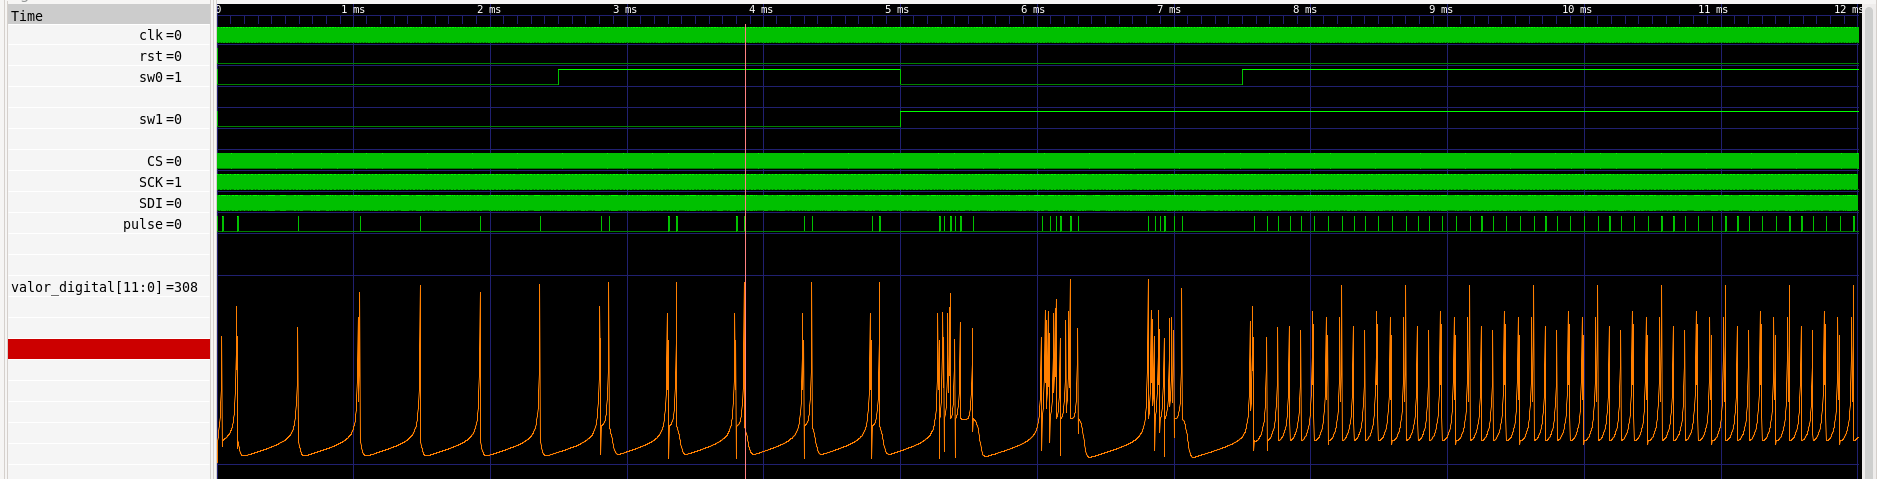

### Digital view

The image below shows the control signals that comprises the SPI protocol such as SDI, CS, SCK among others.

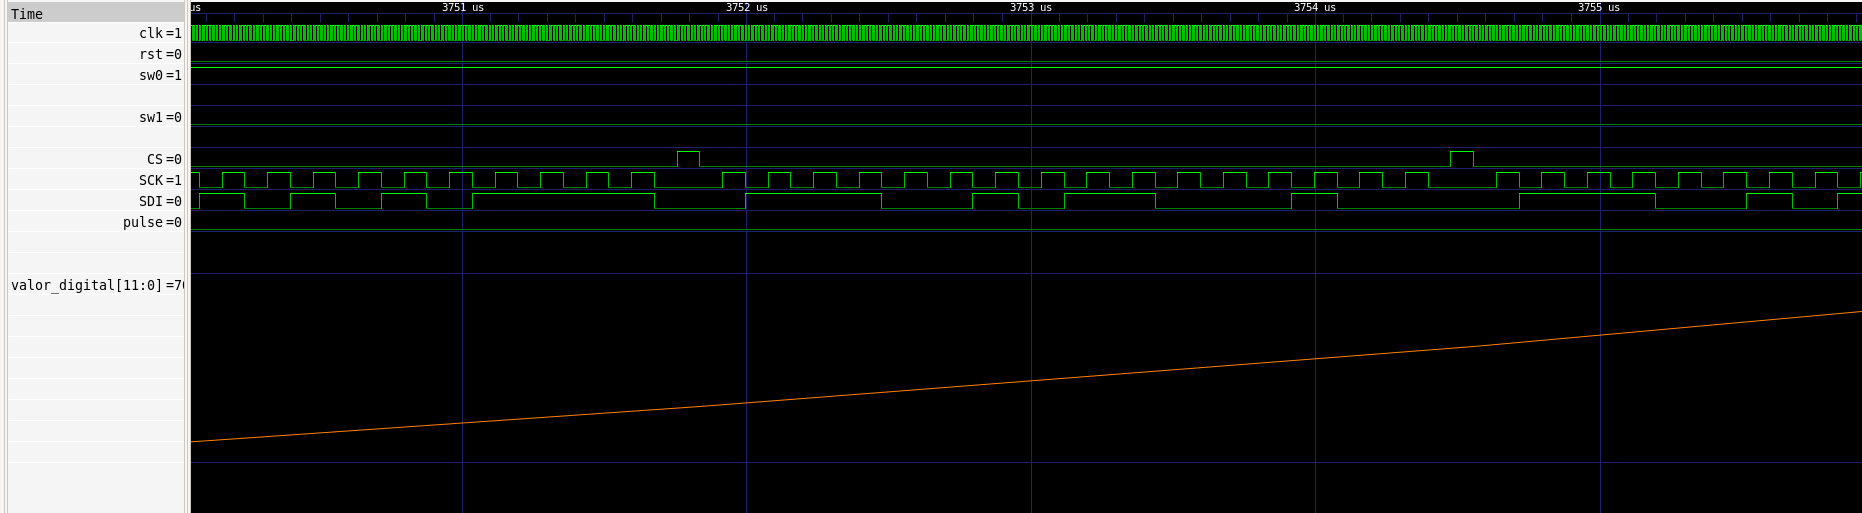

## OpenLane Design Flow for the Izhikevich Neuron

The design flow used to obtain the GDSII file for the Izhikevich neuron was carried out using the OpenLane tool, which integrates various utilities from the OpenROAD suite and physical verification tools such as Magic and KLayout.

The process is automated using the **flow.tcl** script, which sequentially executes the steps of the standard digital design flow, from logic synthesis to final physical verification. The main steps are described below:


In [ ]:
# flow.tcl script

set ::env(OPENLANE_ROOT) [file dirname [file normalize [info script]]]

if { [file exists $::env(OPENLANE_ROOT)/install/env.tcl ] } {
    source $::env(OPENLANE_ROOT)/install/env.tcl
}

if { ! [info exists ::env(OPENROAD_BIN) ] } {
    set ::env(OPENROAD_BIN) openroad
}
if { [info exists ::env(TCL8_5_TM_PATH)] } {
    set ::env(TCL8_5_TM_PATH) "$::env(OPENLANE_ROOT)/scripts:$::env(TCL8_5_TM_PATH)"
} else {
    set ::env(TCL8_5_TM_PATH) "$::env(OPENLANE_ROOT)/scripts"
}
package require openlane; # provides the utils as well

proc run_placement_step {args} {
    if { ! [ info exists ::env(PLACEMENT_CURRENT_DEF) ] } {
        set ::env(PLACEMENT_CURRENT_DEF) $::env(CURRENT_DEF)
    } else {
        set ::env(CURRENT_DEF) $::env(PLACEMENT_CURRENT_DEF)
    }

    run_placement
}

proc run_cts_step {args} {
    if { ! [ info exists ::env(CTS_CURRENT_DEF) ] } {
        set ::env(CTS_CURRENT_DEF) $::env(CURRENT_DEF)
    } else {
        set ::env(CURRENT_DEF) $::env(CTS_CURRENT_DEF)
    }

    run_cts
    run_resizer_timing
}

proc run_routing_step {args} {
    if { ! [ info exists ::env(ROUTING_CURRENT_DEF) ] } {
        set ::env(ROUTING_CURRENT_DEF) $::env(CURRENT_DEF)
    } else {
        set ::env(CURRENT_DEF) $::env(ROUTING_CURRENT_DEF)
    }
    run_routing
}

proc run_parasitics_sta_step {args} {
    if { ! [ info exists ::env(PARSITICS_CURRENT_DEF) ] } {
        set ::env(PARSITICS_CURRENT_DEF) $::env(CURRENT_DEF)
    } else {
        set ::env(CURRENT_DEF) $::env(PARSITICS_CURRENT_DEF)
    }

    if { $::env(RUN_SPEF_EXTRACTION)} {
        run_parasitics_sta
    }
}

proc run_irdrop_report_step {args} {
    if { $::env(RUN_IRDROP_REPORT) } {
        run_irdrop_report
    }
}

proc run_lvs_step {{ lvs_enabled 1 }} {
    if { ! [ info exists ::env(LVS_CURRENT_DEF) ] } {
        set ::env(LVS_CURRENT_DEF) $::env(CURRENT_DEF)
    } else {
        set ::env(CURRENT_DEF) $::env(LVS_CURRENT_DEF)
    }

    if { $lvs_enabled && $::env(RUN_LVS) } {
        run_magic_spice_export;
        run_lvs; # requires run_magic_spice_export
    }

}

proc run_drc_step {{ drc_enabled 1 }} {
    if { ! [ info exists ::env(DRC_CURRENT_DEF) ] } {
        set ::env(DRC_CURRENT_DEF) $::env(CURRENT_DEF)
    } else {
        set ::env(CURRENT_DEF) $::env(DRC_CURRENT_DEF)
    }
    if { $drc_enabled } {
        if { $::env(RUN_MAGIC_DRC) } {
            run_magic_drc
        }
        if {$::env(RUN_KLAYOUT_DRC)} {
            run_klayout_drc
        }
    }
}

proc run_antenna_check_step {{ antenna_check_enabled 1 }} {
    if { ! [ info exists ::env(ANTENNA_CHECK_CURRENT_DEF) ] } {
        set ::env(ANTENNA_CHECK_CURRENT_DEF) $::env(CURRENT_DEF)
    } else {
        set ::env(CURRENT_DEF) $::env(ANTENNA_CHECK_CURRENT_DEF)
    }
    if { $antenna_check_enabled } {
        run_antenna_check
    }
}

proc run_erc_step {args} {
    if { $::env(RUN_CVC) } {
        run_erc
    }
}

proc run_magic_step {args} {
    if {$::env(RUN_MAGIC)} {
        run_magic
    }
}

proc run_klayout_step {args} {
    if {$::env(RUN_KLAYOUT)} {
        run_klayout
    }
    if {$::env(RUN_KLAYOUT_XOR)} {
        run_klayout_gds_xor
    }
}

proc run_timing_check_step {args} {
    check_timing_violations\
        -quit_on_hold_vios [expr $::env(QUIT_ON_TIMING_VIOLATIONS) && $::env(QUIT_ON_HOLD_VIOLATIONS)]\
        -quit_on_setup_vios [expr $::env(QUIT_ON_TIMING_VIOLATIONS) && $::env(QUIT_ON_SETUP_VIOLATIONS)]
}

proc run_verilator_step {} {
    if { $::env(RUN_LINTER) } {
        run_verilator
    }
}

proc run_non_interactive_mode {args} {
    set options {
        {-design optional}
        {-from optional}
        {-to optional}
        {-save_path optional}
        {-override_env optional}
    }
    set flags {-save -run_hooks -no_lvs -no_drc -no_antennacheck -gui}
    parse_key_args "run_non_interactive_mode" args arg_values $options flags_map $flags -no_consume

    if { [info exists arg_values(-from) ] || [info exists arg_values(-to)] } {
        puts_err "-from and -to are no longer supported."
        exit -1
    }

    if { [info exists flags_map(-gui)] } {
        puts_err "Flag -gui is now deprecated. Refer to https://openlane.readthedocs.io/en/latest/reference/gui.html to view files graphically."
        throw_error
    }

    prep {*}$args
    # signal trap SIGINT save_state;

    if { [info exists arg_values(-override_env)] } {
        load_overrides $arg_values(-override_env)
    }

    set LVS_ENABLED [expr ![info exists flags_map(-no_lvs)] ]
    set DRC_ENABLED [expr ![info exists flags_map(-no_drc)] ]

    set ANTENNACHECK_ENABLED [expr ![info exists flags_map(-no_antennacheck)] ]

    set steps [dict create \
        "verilator_lint_check" "run_verilator_step" \
        "synthesis" "run_synthesis" \
        "floorplan" "run_floorplan" \
        "placement" "run_placement_step" \
        "cts" "run_cts_step" \
        "routing" "run_routing_step" \
        "parasitics_sta" "run_parasitics_sta_step" \
        "irdrop" "run_irdrop_report_step" \
        "gds_magic" "run_magic_step" \
        "gds_klayout" "run_klayout_step" \
        "lvs" "run_lvs_step $LVS_ENABLED " \
        "drc" "run_drc_step $DRC_ENABLED " \
        "antenna_check" "run_antenna_check_step $ANTENNACHECK_ENABLED " \
        "cvc_rv" "run_erc_step"
    ]

    set ::env(CURRENT_STEP) "verilator_lint_check"

    set start_step $::env(CURRENT_STEP)
    set end_step "cvc_rv"

    set failed 0;
    set exe 0;
    dict for {step_name step_exe} $steps {
        if { [ string equal $start_step $step_name ] } {
            set exe 1;
        }

        if { $exe } {
            # For when it fails
            set ::env(CURRENT_STEP) $step_name

            set step_result [catch [lindex $step_exe 0] [lindex $step_exe 1] err];
            if { $step_result } {
                set failed 1;
                puts_err "Step $::env(CURRENT_INDEX) ($step_name) failed with error:\n$err"
                set exe 0;
                break;
            }
        }

        if { [ string equal $end_step $step_name ] } {
            set exe 0:
            break;
        }

    }

    # for when it resumes
    set steps_as_list [dict keys $steps]
    set next_idx [expr [lsearch $steps_as_list $::env(CURRENT_STEP)] + 1]
    set ::env(CURRENT_STEP) [lindex $steps_as_list $next_idx]

    if { $failed } {
        flow_fail
    }
    # Saves to <RUN_DIR>/results/final
    save_final_views

    # Saves to design directory or custom
    if {  [info exists flags_map(-save) ] } {
        if { ! [info exists arg_values(-save_path)] } {
            set arg_values(-save_path) $::env(DESIGN_DIR)
        }
        save_final_views -save_path $arg_values(-save_path) -tag $::env(RUN_TAG)
    }
    calc_total_runtime
    save_state
    generate_final_summary_report

    if { [catch run_timing_check_step] } {
        flow_fail
    }

    if { [info exists arg_values(-save_path)] && $arg_values(-save_path) != "" } {
        set ::env(HOOK_OUTPUT_PATH) "[file normalize $arg_values(-save_path)]"
    } else {
        set ::env(HOOK_OUTPUT_PATH) $::env(RESULTS_DIR)/final
    }

    if {[info exists flags_map(-run_hooks)]} {
        run_post_run_hooks
    }

    puts_success "Flow complete."

    show_warnings "Note that the following warnings have been generated:"
}

proc run_interactive_mode {args} {
    set options {
        {-design optional}
    }
    set flags {}
    parse_key_args "run_interactive_mode" args arg_values $options flags_map $flags -no_consume

    if { [info exists arg_values(-design)] } {
        prep {*}$args
    }

    set ::env(TCLLIBPATH) $::auto_path
    exec tclsh >&@stdout
}

proc run_magic_drc_batch {args} {
    set options {
        {-magicrc optional}
        {-tech optional}
        {-report required}
        {-design required}
        {-gds required}
    }
    set flags {}
    parse_key_args "run_magic_drc_batch" args arg_values $options flags_mag $flags
    if { [info exists arg_values(-magicrc)] } {
        set magicrc [file normalize $arg_values(-magicrc)]
    }
    if { [info exists arg_values(-tech)] } {
        set ::env(TECH) [file normalize $arg_values(-tech)]
    }
    set ::env(GDS_INPUT) [file normalize $arg_values(-gds)]
    set ::env(REPORT_OUTPUT) [file normalize $arg_values(-report)]
    set ::env(DESIGN_NAME) $arg_values(-design)

    if { [info exists magicrc] } {
        exec magic \
            -noconsole \
            -dnull \
            -rcfile $magicrc \
            $::env(OPENLANE_ROOT)/scripts/magic/gds/drc_batch.tcl \
            </dev/null |& tee /dev/tty
    } else {
        exec magic \
            -noconsole \
            -dnull \
            $::env(OPENLANE_ROOT)/scripts/magic/gds/drc_batch.tcl \
            </dev/null |& tee /dev/tty
    }
}

proc run_lvs_batch {args} {
    # runs device level lvs on -gds/CURRENT_GDS and -net/CURRENT_NETLIST
    # extracts gds only if EXT_NETLIST does not exist
    set options {
        {-design required}
        {-gds optional}
        {-net optional}
    }
    set flags {}
    parse_key_args "run_lvs_batch" args arg_values $options flags_lvs $flags -no_consume

    prep {*}$args

    if { [info exists arg_values(-gds)] } {
        set ::env(CURRENT_GDS) [file normalize $arg_values(-gds)]
    } else {
        set ::env(CURRENT_GDS) $::env(signoff_results)/$::env(DESIGN_NAME).gds
    }
    if { [info exists arg_values(-net)] } {
        set ::env(CURRENT_POWERED_NETLIST) [file normalize $arg_values(-net)]
    }

    assert_files_exist "$::env(CURRENT_GDS) $::env(CURRENT_POWERED_NETLIST)"

    set ::env(MAGIC_EXT_USE_GDS) 1
    set ::env(EXT_NETLIST) $::env(signoff_results)/$::env(DESIGN_NAME).gds.spice
    if { [file exists $::env(EXT_NETLIST)] } {
        puts_warn "The file $::env(EXT_NETLIST) will be used. If you would like the file re-exported, please delete it."
    } else {
        run_magic_spice_export
    }

    set ::env(LVS_INSERT_POWER_PINS) 0
    run_lvs

    calc_total_runtime
    save_state
    generate_final_summary_report
    puts_success "LVS success."
    show_warnings "Note that the following warnings have been generated:"
}


proc run_file {args} {
    set ::env(TCLLIBPATH) $::auto_path
    exec env EXIT_ON_ERROR=1 tclsh {*}$args >&@stdout
}

set options {
    {-file optional}
}

set flags {-interactive -it -drc -lvs -synth_explore -run_hooks}

parse_key_args "flow.tcl" argv arg_values $options flags_map $flags -no_consume

if {[catch {exec cat $::env(OPENLANE_ROOT)/install/installed_version} ::env(OPENLANE_COMMIT)]} {
    if {[catch {exec cat /git_version} ::env(OPENLANE_COMMIT)]} {
        if {[catch {exec git --git-dir $::env(OPENLANE_ROOT)/.git rev-parse HEAD} ::env(OPENLANE_COMMIT)]} {
            set ::env(OPENLANE_COMMIT) "UNKNOWN"
        }
    }
}

if { [file isdirectory $::env(OPENLANE_ROOT)/.git] } {
    if {![catch {exec git --git-dir $::env(OPENLANE_ROOT)/.git rev-parse HEAD} ::env(OPENLANE_MOUNTED_SCRIPTS_VERSION)]} {
        if { $::env(OPENLANE_COMMIT) == $::env(OPENLANE_MOUNTED_SCRIPTS_VERSION)} {
            unset ::env(OPENLANE_MOUNTED_SCRIPTS_VERSION)
        }
    }
}

puts "OpenLane v[package version openlane] ($::env(OPENLANE_COMMIT))"
if { [info exists ::env(OPENLANE_MOUNTED_SCRIPTS_VERSION)] } {
    puts "(with mounted scripts from $::env(OPENLANE_MOUNTED_SCRIPTS_VERSION))"
}
puts "All rights reserved. (c) 2020-2025 Efabless Corporation and contributors."
puts "Available under the Apache License, version 2.0. See the LICENSE file for more details."
puts ""

if { [info exists flags_map(-interactive)] || [info exists flags_map(-it)] } {
    if { [info exists arg_values(-file)] } {
        run_file [file normalize $arg_values(-file)] {*}$argv
    } else {
        run_interactive_mode {*}$argv
    }
} elseif { [info exists flags_map(-drc)] } {
    run_magic_drc_batch {*}$argv
} elseif { [info exists flags_map(-lvs)] } {
    run_lvs_batch {*}$argv
} elseif { [info exists flags_map(-synth_explore)] } {
    prep {*}$argv
    run_synth_exploration
} else {
    run_non_interactive_mode {*}$argv
}



1. **Environment Configuration**:
The environment variables (::env) that define the tool paths, standard libraries, and technology parameters are initialized.

In [ ]:
# Set up environment
set ::env(DESIGN_NAME) "izhikevich_neuron"
set ::env(VERILOG_FILES) [list "izhikevich.v" "top_neuron.v"]
set ::env(VERILOG_PARAMETERS) [list ...]
# Technology and libraries
set ::env(PDK) "sky130"
set ::env(STD_CELL_LIBRARY) "sky130_fd_sc_hd__tt_025C_1v80.lib"
...

2. **Synthesis (run_synthesis)**:
The Verilog RTL description of the neuron is synthesized using Yosys, generating a netlist optimized based on the area and operating frequency.

In [ ]:
run_synthesis \
    -top top_neuron \
    -src [lindex $::env(VERILOG_FILES) 0] \
    -tech $::env(PDK) \
    -lib $::env(STD_CELL_LIBRARY] \
    -par 4 \
    -o synthesized.v \
    ;

3. **Floorplanning (run_floorplan)**:
The chip geometry, margins, input/output pin placement, and power regions (VDD/VSS) are defined.

In [ ]:
run_floorplan \
    -design $::env(DESIGN_NAME) \
    -die_area {0 0 2000 2000} \
    -io_ring_width 200 \
    -core_margin 100 \
    -power_grid {VDD VSS} \
    -pin_order_file pin_order.txt \
    ;

4. **Placement (run_placement)**:
Standard components (logic cells) are placed within the design area using the global and detailed placement algorithm.

In [ ]:
run_placement \
    -design $::env(DESIGN_NAME) \
    -placement_density 0.7 \
    -max_displacement 50 \
    ;

5. **Clock Tree Synthesis (run_cts)**:
The clock tree is built using OpenROAD CTS, balancing latency and reducing skew between clock branches.

In [ ]:
run_cts \
    -design $::env(DESIGN_NAME) \
    -buffer_library $::env(FLIP_FLOP_LIBRARY) \
    -skew_target 50ps \
    ;

6. **Routing (run_routing)**:
Global and detailed routing of interconnections between cells is performed, respecting process design rules (DRC).

In [ ]:
run_routing \
    -design $::env(DESIGN_NAME) \
    -global_route true \
    -detailed_route true \
    -via_stack_limit 3 \
    ;

7. **Parasitic Extraction and Timing Analysis (run_parasitics_sta_step)**:
Parasitic parameters (capacitances and resistances) are extracted from the layout, and timing performance is evaluated using OpenSTA.

In [ ]:
run_parasitics_sta_step \
    -design $::env(DESIGN_NAME) \
    -extracted_netlist extracted.spice \
    -sta_tool opensta \
    -timing_report timing.rpt \
    ;

8. **Antenna Check (run_antenna_check_step)**:
Antenna effect violations that can damage gates during manufacturing are reviewed.

In [ ]:
run_antenna_check_step \
    -design $::env(DESIGN_NAME) \
    -antenna_rules antenna_rules.txt \
    -report antenna_report.txt \
    ;

9. **Physical Verification**:

*   DRC (run_drc_step): Design rule checks are performed using Magic and KLayout.
*   LVS (run_lvs_step): The netlist extracted from the layout is compared with the logical netlist to ensure electrical correspondence.
*   ERC (run_erc_step): Possible electrical errors (such as short circuits or floating nodes) are detected.

In [ ]:
run_drc_step \
    -design $::env(DESIGN_NAME) \
    -magic_techfile sky130.tech \
    -report drc_report.txt \
    ;
run_lvs_step \
    -design $::env(DESIGN_NAME) \
    -magic_techfile sky130.tech \
    -netlist synthesized.v \
    -report lvs_report.txt \
    ;
run_erc_step \
    -design $::env(DESIGN_NAME) \
    -report erc_report.txt \
    ;

10. **Final layout generation (run_magic_step)**:
Finally, the GDSII file is generated, which represents the complete layout of the Izhikevich neuron design, ready for the manufacturing or subsequent analysis stage.

In [ ]:
run_magic_step \
    -design $::env(DESIGN_NAME) \
    -output_gds ${::env(DESIGN_NAME)}.gds \
    ;

# GDSII Final Layout Visualized in Klayout

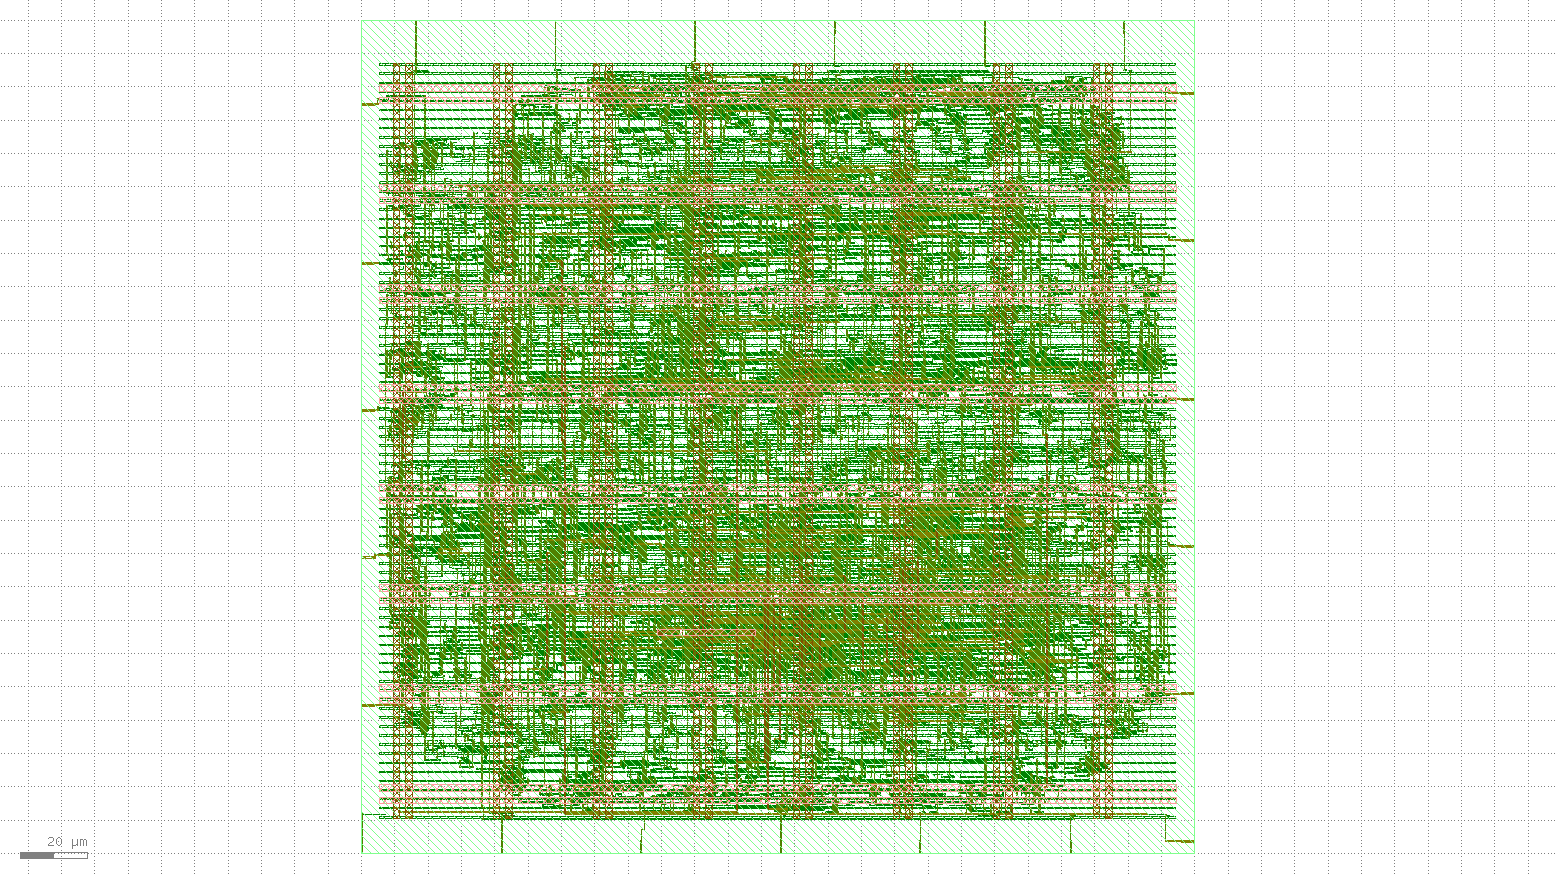

This GDSII layout was based in the following .json file that contains the parameters of the design presented in this project.

In [ ]:
{
    "_comment": "Required variables",
    "DESIGN_NAME":"Modulo_top",
    "VERILOG_FILES": "dir::src/*.v",
    "CLOCK_PERIOD": 80.0,
    "CLOCK_PORT": "clk",
    "CLOCK_NET": "clk",

    "_comment": "Synthesis",
    "IO_PCT": 0.2,
    "SYNTH_CLOCK_UNCERTAINTY":0.25,
    "SYNTH_CLOCK_TRANSITION" :0.15,
    "MAX_FANOUT_CONSTRAINT": 10,

    "_comment": "FloorPlanning",
    "FP_SIZING": "absolute",
    "DIE_AREA": "0 0 250 250",
    "FP_CORE_SIZE": "240 240",
    "FP_CORE_UTIL": 0.7,
    "FP_PDN_VOFFSET": 5,
    "FP_PDN_HOFFSET": 5,
    "FP_PDN_VWIDTH": 2,
    "FP_PDN_HWIDTH": 2,
    "FP_PDN_VPITCH": 30,
    "FP_PDN_HPITCH": 30,
    "FP_PDN_SKIPTRIM": true,

    "_comment": "Placement",
    "PL_ROUTABILITY_DRIVEN": 1,
    "PL_TARGET_DENSITY": 0.6,
    "PL_RESIZER_DESIGN_OPTIMIZATIONS": 1,
    "PL_RESIZER_TIMING_OPTIMIZATIONS": 0,
    "PL_RESIZER_HOLD_SLACK_MARGIN": 0.1,
    "PL_RESIZER_SETUP_SLACK_MARGIN":0.05,
    "PL_RESIZER_HOLD_MAX_BUFFER_PERCENT": 50,
    "PL_RESIZER_SETUP_MAX_BUFFER_PERCENT":50,

    "_comment": "PDK library",
    "pdk::sky130*": {
        "scl::sky130_fd_sc_hs": {},
        "scl::sky130_fd_sc_ls": {}
    }

}